In [1]:
import hhgen.plots as plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.externals import joblib

In [2]:
features = ['hh_m','hh_pt', 'hh_eta','hgg_pt_hh_m','hbb_pt_hh_m','cos_theta_cs','cos_theta_hbb','cos_theta_hgg']
features+=['leadJet_pt','leadJet_eta','subleadJet_pt','subleadJet_eta']
features+=['leadPho_pt','leadPho_eta','subleadPho_pt','subleadPho_eta']

scaler=RobustScaler()

In [3]:
node_6=pd.read_hdf("node_6.hd5")
node_9=pd.read_hdf("node_9.hd5")
node_4=pd.read_hdf("node_4.hd5")
node_SM=pd.read_hdf("node_SM.hd5")

frames=[node_6,node_9,node_4,node_SM]
df=pd.concat(frames)

#ignoring cat 0
df=df[df.cat>0]
df.weight/=df.weight.mean()

#indexing
random_index = np.arange(df.shape[0]) 
np.random.shuffle(random_index)
df["random_index"]=random_index 
df.set_index("random_index",inplace=True)
df.sort_index(inplace=True)

In [4]:
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

clf=joblib.load('clf_opt.joblib')
rw=np.loadtxt("rw_opt.txt")

In [5]:
#reset indices
X_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)
w_test.reset_index(drop=True,inplace=True)

Weighted least squares for true/pred plot:  5.74604131093
Spread for truth/pred plot:  0.144523524723


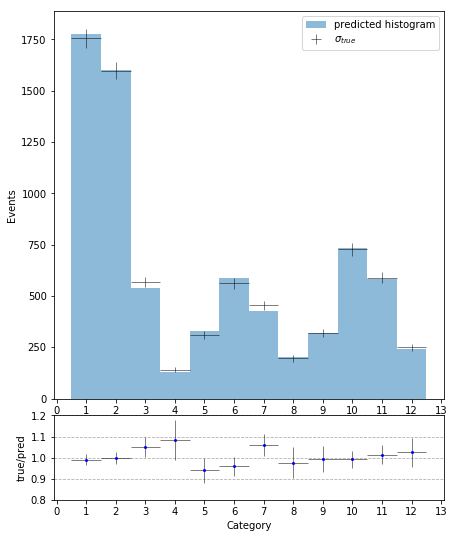

In [6]:
#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)

y_pred_weight=np.multiply(y_pred_prob,w_test.reshape(-1,1))
y_pred= np.arange(1,13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

In [7]:
#scaling data back
X_test=pd.DataFrame(scaler.inverse_transform(X_test))

In [8]:
#predicted
y_pred_weight=pd.DataFrame(y_pred_weight)

frames=[X_test,y_test,w_test]
df = pd.concat(frames,axis=1,ignore_index=True)

df.columns=['hh_m','hh_pt', 'hh_eta','hgg_pt_hh_m','hbb_pt_hh_m','cos_theta_cs','cos_theta_hbb','cos_theta_hgg',
            'leadJet_pt','leadJet_eta','subleadJet_pt','subleadJet_eta','leadPho_pt','leadPho_eta',
            'subleadPho_pt','subleadPho_eta','cat_true','w_true']

Total number of event in pred hist:  1576.27241715
Total number of event in true hist:  1554.96661601


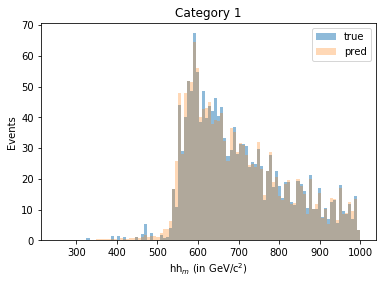

Total number of event in pred hist:  1598.23952424
Total number of event in true hist:  1597.29393519


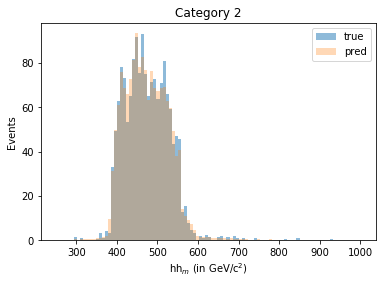

Total number of event in pred hist:  539.333053148
Total number of event in true hist:  567.590690494


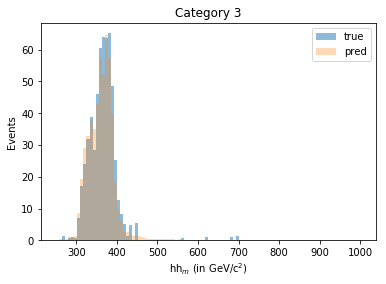

Total number of event in pred hist:  130.573225965
Total number of event in true hist:  141.692444487


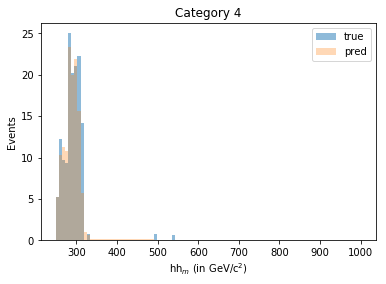

Total number of event in pred hist:  305.973347447
Total number of event in true hist:  285.70925867


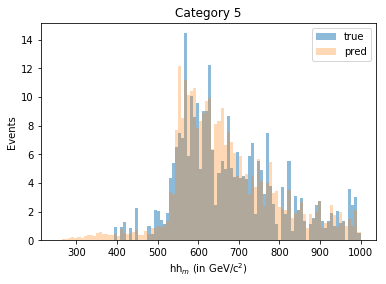

Total number of event in pred hist:  584.658094536
Total number of event in true hist:  560.720395009


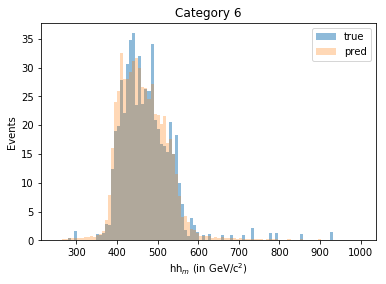

Total number of event in pred hist:  427.52607314
Total number of event in true hist:  453.679127928


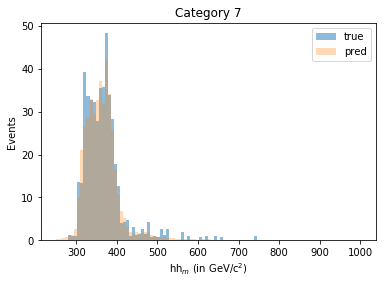

Total number of event in pred hist:  200.241317101
Total number of event in true hist:  195.010700509


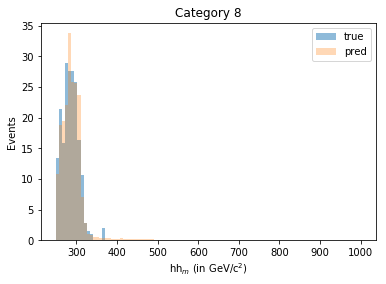

Total number of event in pred hist:  297.556132039
Total number of event in true hist:  295.928118638


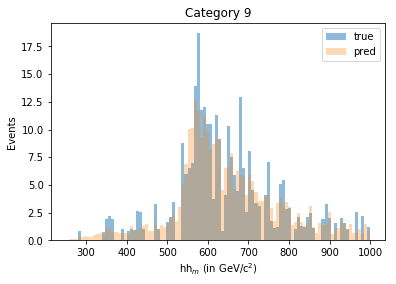

Total number of event in pred hist:  731.701359038
Total number of event in true hist:  725.065950751


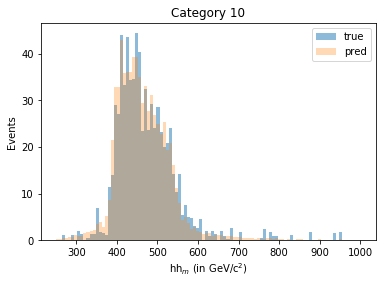

Total number of event in pred hist:  581.091776972
Total number of event in true hist:  589.334735863


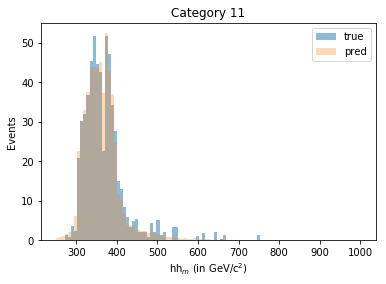

Total number of event in pred hist:  242.912859555
Total number of event in true hist:  249.087210931


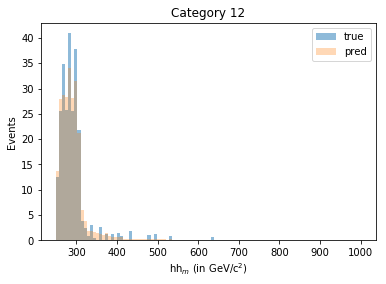

In [9]:
for i in range (0,12):
    cat_true=df[df.cat_true==i+1]
    plt.hist(cat_true['hh_m'],weights=cat_true.w_true,range=[250,1000],bins=100,alpha=0.5,label='true')
    plt.hist(df['hh_m'].ravel(),weights=y_pred_weight[i].ravel(),range=[250,1000],bins=100,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['hh_m'],weights=cat_true.w_true,range=[250,1000],bins=100)
    h_pred=np.histogram(df['hh_m'].ravel(),weights=y_pred_weight[i].ravel(),range=[250,1000],bins=100)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("hh$_m$ (in GeV/c$^2$)")
    plt.title('Category %d'%(i+1))
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  353.399333568
Total number of event in true hist:  363.754409573


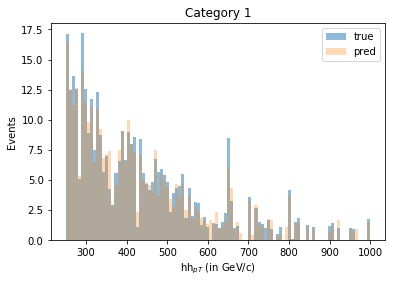

Total number of event in pred hist:  301.614676244
Total number of event in true hist:  294.59515728


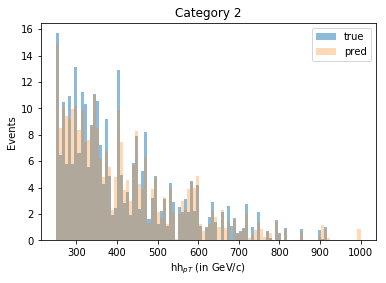

Total number of event in pred hist:  113.797256309
Total number of event in true hist:  123.914758127


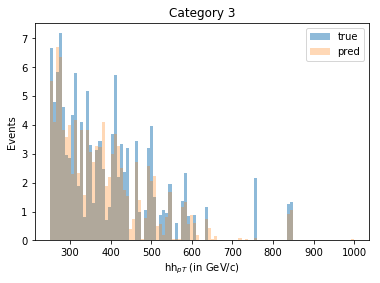

Total number of event in pred hist:  30.7372153986
Total number of event in true hist:  26.8465716713


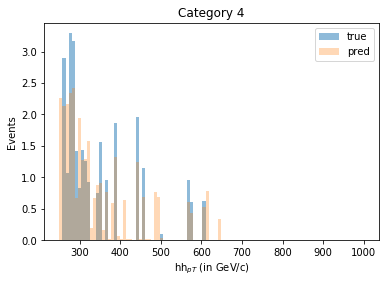

Total number of event in pred hist:  60.3317535463
Total number of event in true hist:  57.5637847713


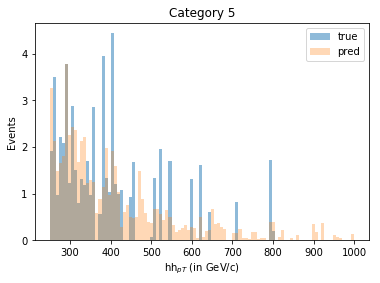

Total number of event in pred hist:  69.1221999783
Total number of event in true hist:  65.5186365163


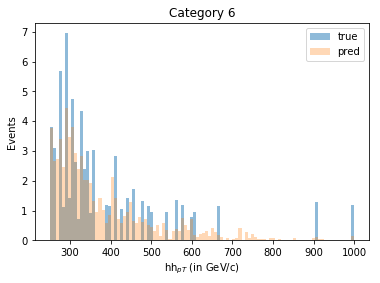

Total number of event in pred hist:  45.1180419876
Total number of event in true hist:  42.5900369069


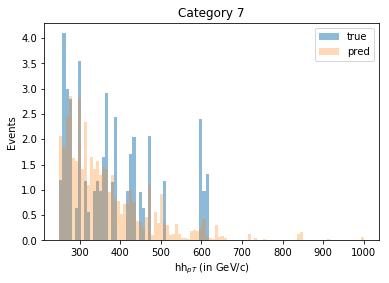

Total number of event in pred hist:  11.3119202386
Total number of event in true hist:  12.7831662017


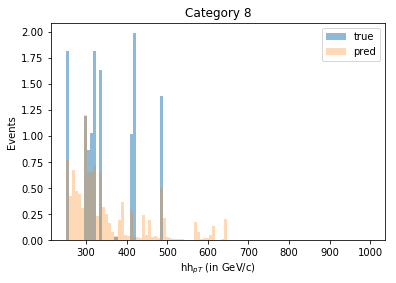

Total number of event in pred hist:  59.8054506063
Total number of event in true hist:  52.9270826378


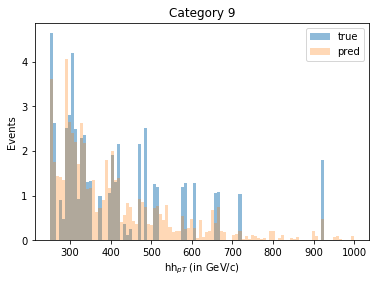

Total number of event in pred hist:  76.5342522837
Total number of event in true hist:  71.1395608079


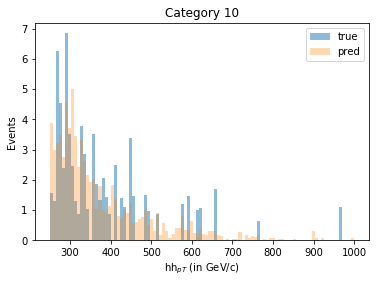

Total number of event in pred hist:  38.7501143546
Total number of event in true hist:  47.9587807848


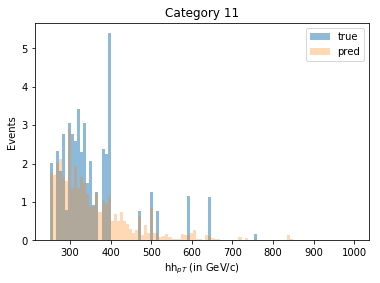

Total number of event in pred hist:  10.0867442554
Total number of event in true hist:  11.0170148256


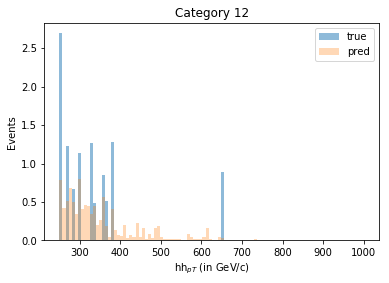

In [10]:
for i in range (0,12):
    cat_true=df[df.cat_true==i+1]
    plt.hist(cat_true['hh_pt'].ravel(),weights=cat_true.w_true.ravel(),range=[250,1000],bins=100,alpha=0.5,label='true')
    plt.hist(df['hh_pt'].ravel(),weights=y_pred_weight[i].ravel(),range=[250,1000],bins=100,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['hh_pt'],weights=cat_true.w_true,range=[250,1000],bins=100)
    h_pred=np.histogram(df['hh_pt'].ravel(),weights=y_pred_weight[i].ravel(),range=[250,1000],bins=100)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("hh$_{pT}$ (in GeV/c)")
    plt.title('Category %d'%(i+1))
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  1774.64943897
Total number of event in true hist:  1755.55195523


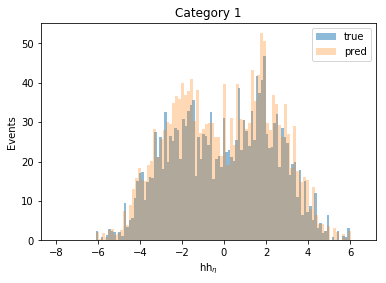

Total number of event in pred hist:  1600.48539193
Total number of event in true hist:  1598.31203357


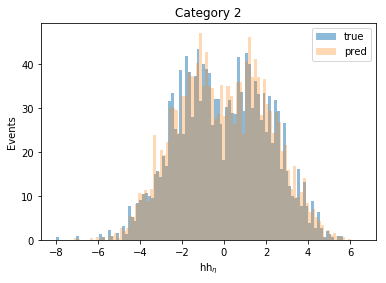

Total number of event in pred hist:  539.838829384
Total number of event in true hist:  567.590690494


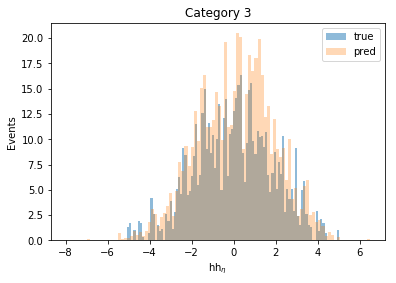

Total number of event in pred hist:  130.657690874
Total number of event in true hist:  141.692444487


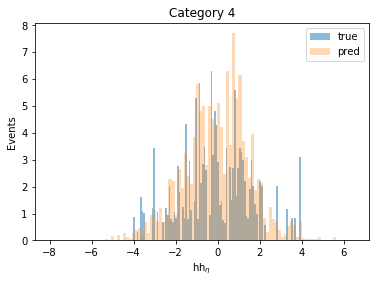

Total number of event in pred hist:  331.561212845
Total number of event in true hist:  311.644967954


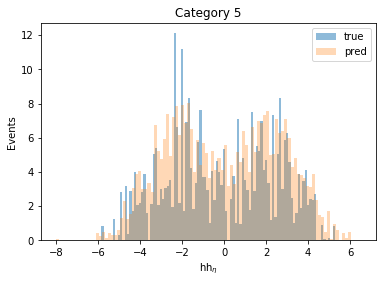

Total number of event in pred hist:  585.95770503
Total number of event in true hist:  561.910226826


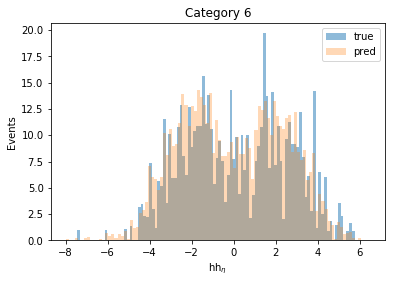

Total number of event in pred hist:  427.909447452
Total number of event in true hist:  453.679127928


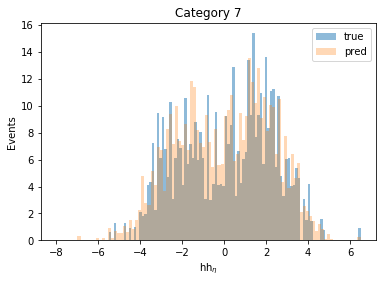

Total number of event in pred hist:  200.353952549
Total number of event in true hist:  195.378621365


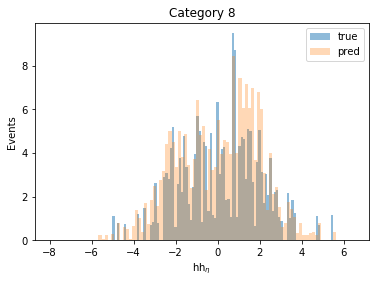

Total number of event in pred hist:  320.168402865
Total number of event in true hist:  318.33864342


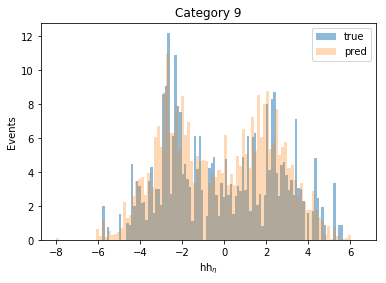

Total number of event in pred hist:  733.629108547
Total number of event in true hist:  727.188727313


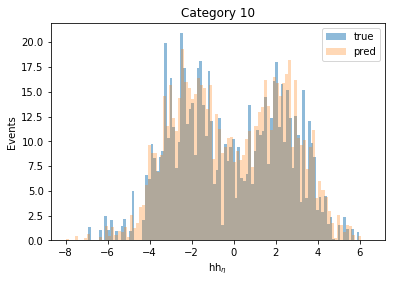

Total number of event in pred hist:  581.465509272
Total number of event in true hist:  589.334735863


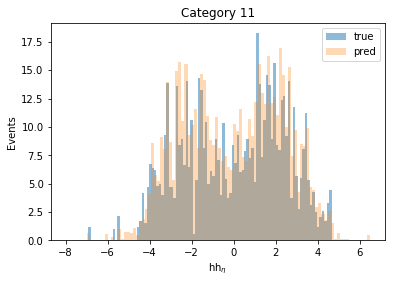

Total number of event in pred hist:  243.032690879
Total number of event in true hist:  249.087210931


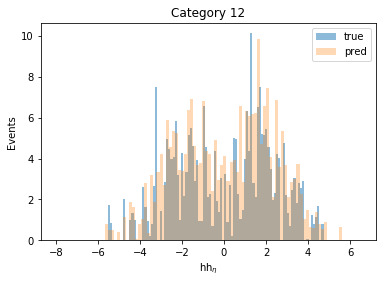

In [11]:
for i in range (0,12):
    cat_true=df[df.cat_true==i+1]
    plt.hist(cat_true['hh_eta'].ravel(),weights=cat_true.w_true.ravel(),bins=100,alpha=0.5,label='true')
    plt.hist(df['hh_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=100,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['hh_eta'],weights=cat_true.w_true,bins=100)
    h_pred=np.histogram(df['hh_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=100)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("hh$_{\eta}$")
    plt.title('Category %d'%(i+1))
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  1774.64943897
Total number of event in true hist:  1755.55195523


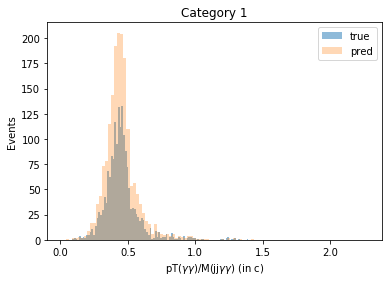

Total number of event in pred hist:  1600.48539193
Total number of event in true hist:  1598.31203357


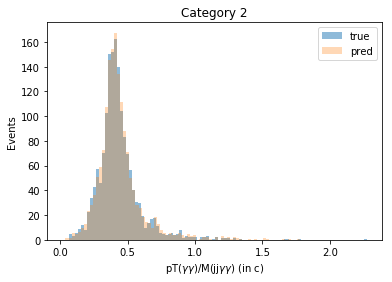

Total number of event in pred hist:  539.838829384
Total number of event in true hist:  567.590690494


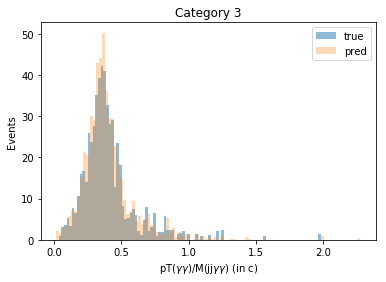

Total number of event in pred hist:  130.657690874
Total number of event in true hist:  141.692444487


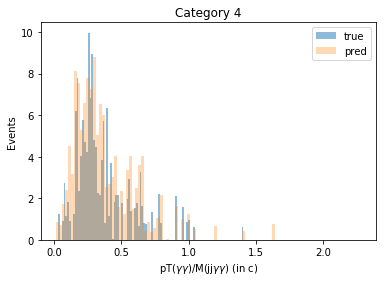

Total number of event in pred hist:  331.561212845
Total number of event in true hist:  311.644967954


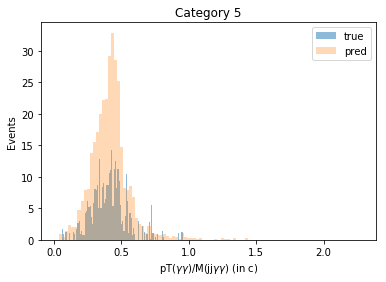

Total number of event in pred hist:  585.95770503
Total number of event in true hist:  561.910226826


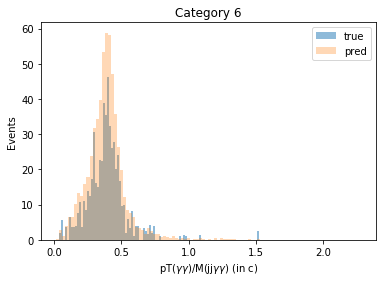

Total number of event in pred hist:  427.909447452
Total number of event in true hist:  453.679127928


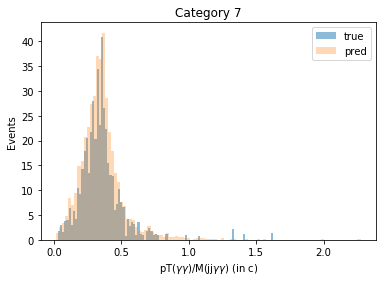

Total number of event in pred hist:  200.353952549
Total number of event in true hist:  195.378621365


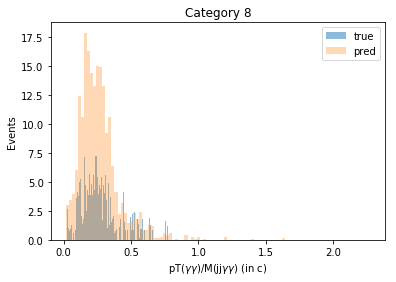

Total number of event in pred hist:  320.168402865
Total number of event in true hist:  318.33864342


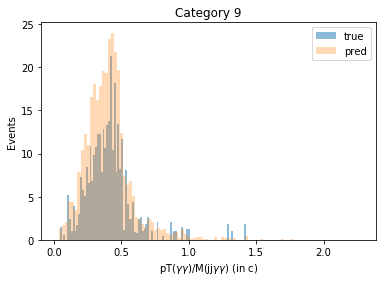

Total number of event in pred hist:  733.629108547
Total number of event in true hist:  727.188727313


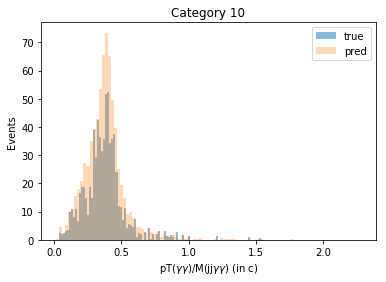

Total number of event in pred hist:  581.465509272
Total number of event in true hist:  589.334735863


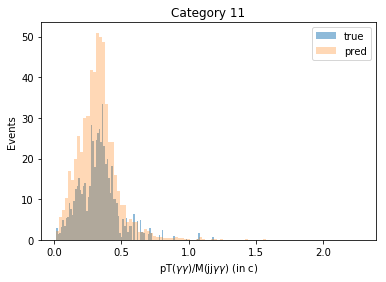

Total number of event in pred hist:  243.032690879
Total number of event in true hist:  249.087210931


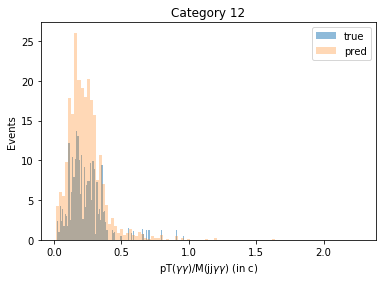

In [12]:
for i in range (0,12):
    cat_true=df[df.cat_true==i+1]
    plt.hist(cat_true['hgg_pt_hh_m'].ravel(),weights=cat_true.w_true.ravel(),bins=100,alpha=0.5,label='true')
    plt.hist(df['hgg_pt_hh_m'].ravel(),weights=y_pred_weight[i].ravel(),bins=100,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['hgg_pt_hh_m'],weights=cat_true.w_true,bins=100)
    h_pred=np.histogram(df['hgg_pt_hh_m'].ravel(),weights=y_pred_weight[i].ravel(),bins=100)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("pT($\gamma\gamma$)/M(jj$\gamma\gamma$) (in c)")
    plt.title('Category %d'%(i+1))
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  1774.64943897
Total number of event in true hist:  1755.55195523


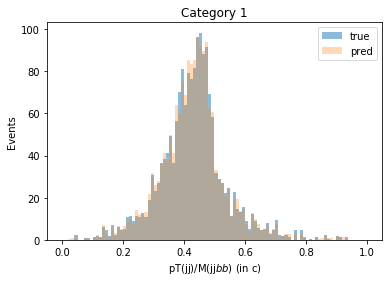

Total number of event in pred hist:  1600.48539193
Total number of event in true hist:  1598.31203357


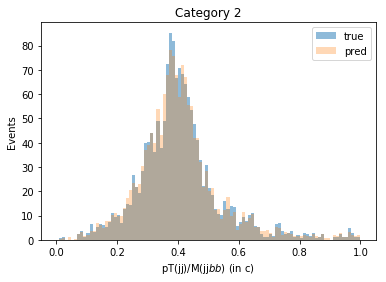

Total number of event in pred hist:  539.838829384
Total number of event in true hist:  567.590690494


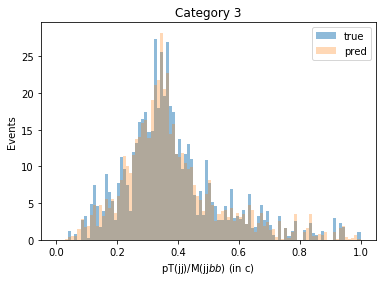

Total number of event in pred hist:  130.657690874
Total number of event in true hist:  141.692444487


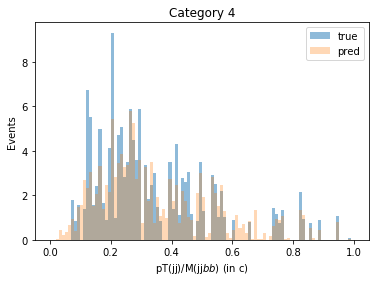

Total number of event in pred hist:  331.561212845
Total number of event in true hist:  311.644967954


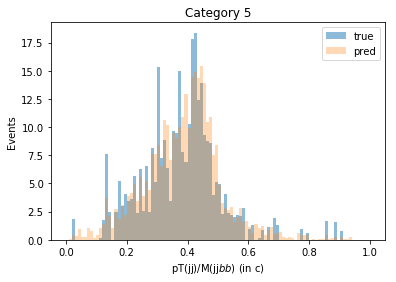

Total number of event in pred hist:  585.95770503
Total number of event in true hist:  561.910226826


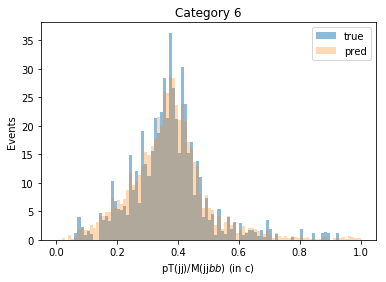

Total number of event in pred hist:  427.909447452
Total number of event in true hist:  453.679127928


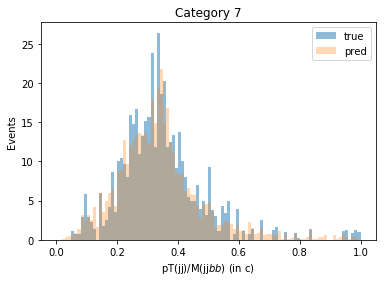

Total number of event in pred hist:  200.353952549
Total number of event in true hist:  195.378621365


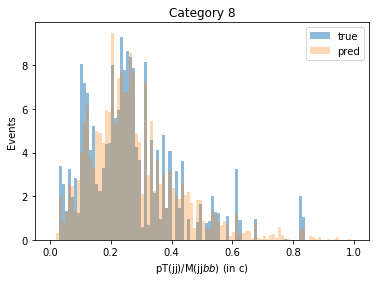

Total number of event in pred hist:  320.168402865
Total number of event in true hist:  318.33864342


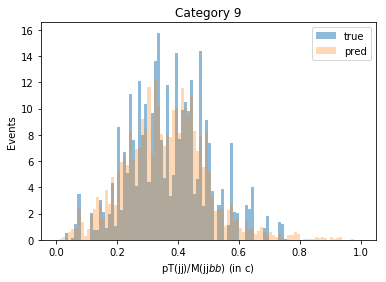

Total number of event in pred hist:  733.629108547
Total number of event in true hist:  727.188727313


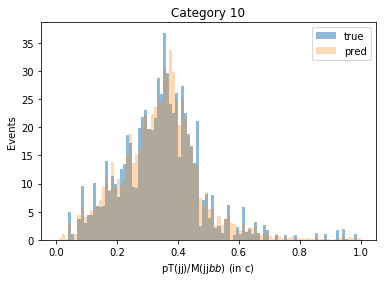

Total number of event in pred hist:  581.465509272
Total number of event in true hist:  589.334735863


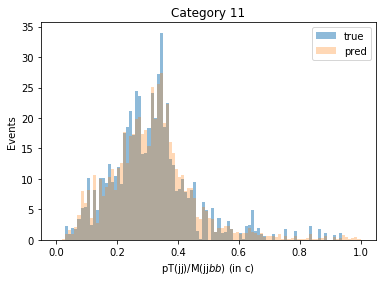

Total number of event in pred hist:  243.032690879
Total number of event in true hist:  249.087210931


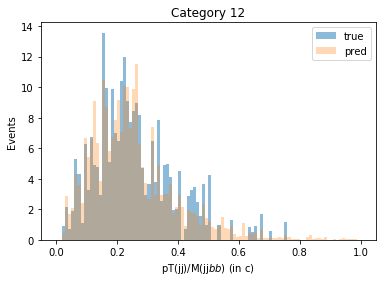

In [13]:
for i in range (0,12):
    cat_true=df[df.cat_true==i+1]
    plt.hist(cat_true['hbb_pt_hh_m'].ravel(),range=[0,1],weights=cat_true.w_true.ravel(),bins=100,alpha=0.5,label='true')
    plt.hist(df['hbb_pt_hh_m'].ravel(),range=[0,1],weights=y_pred_weight[i].ravel(),bins=100,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['hbb_pt_hh_m'],weights=cat_true.w_true,bins=100)
    h_pred=np.histogram(df['hbb_pt_hh_m'].ravel(),weights=y_pred_weight[i].ravel(),bins=100)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("pT(jj)/M(jj$bb$) (in c)")
    plt.title('Category %d'%(i+1))
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  1774.64943897
Total number of event in true hist:  1755.55195523


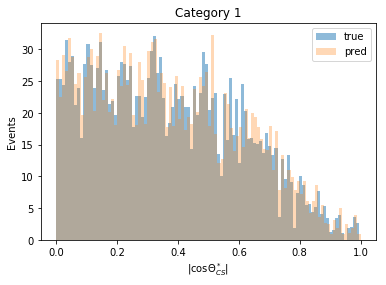

Total number of event in pred hist:  1600.48539193
Total number of event in true hist:  1598.31203357


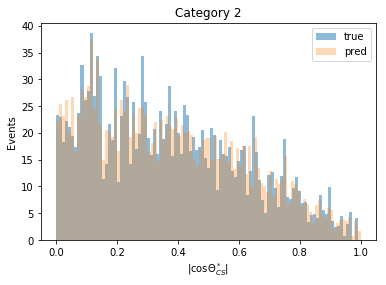

Total number of event in pred hist:  539.838829384
Total number of event in true hist:  567.590690494


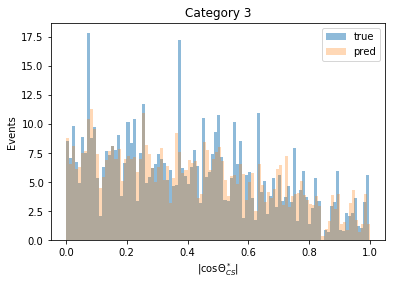

Total number of event in pred hist:  130.657690874
Total number of event in true hist:  141.692444487


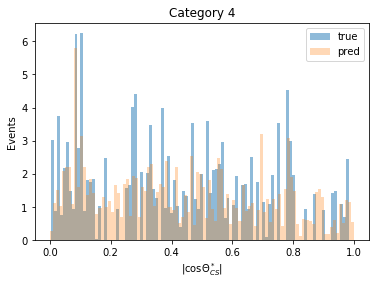

Total number of event in pred hist:  331.561212845
Total number of event in true hist:  311.644967954


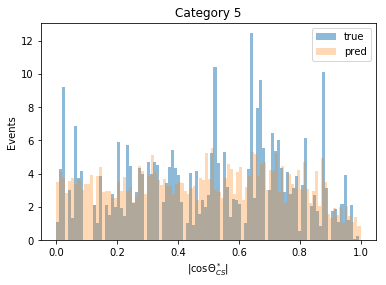

Total number of event in pred hist:  585.95770503
Total number of event in true hist:  561.910226826


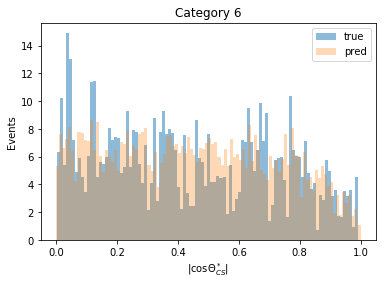

Total number of event in pred hist:  427.909447452
Total number of event in true hist:  453.679127928


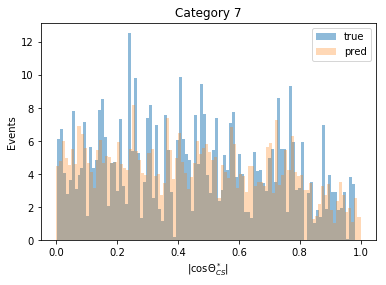

Total number of event in pred hist:  200.353952549
Total number of event in true hist:  195.378621365


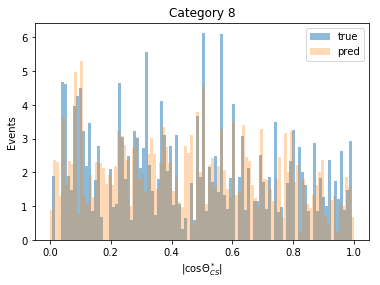

Total number of event in pred hist:  320.168402865
Total number of event in true hist:  318.33864342


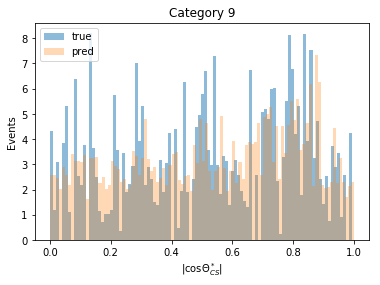

Total number of event in pred hist:  733.629108547
Total number of event in true hist:  727.188727313


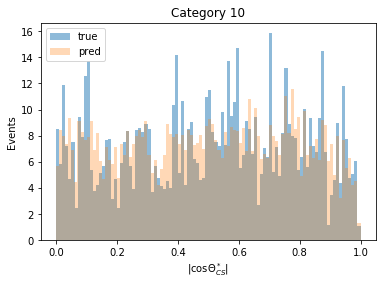

Total number of event in pred hist:  581.465509272
Total number of event in true hist:  589.334735863


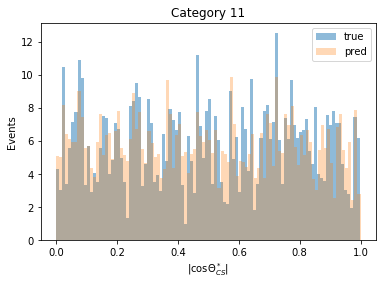

Total number of event in pred hist:  243.032690879
Total number of event in true hist:  249.087210931


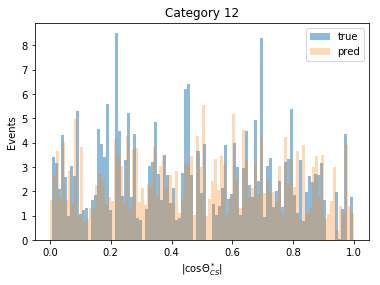

In [14]:
for i in range (0,12):
    cat_true=df[df.cat_true==i+1]
    plt.hist(np.abs(cat_true['cos_theta_cs'].ravel()),weights=cat_true.w_true.ravel(),bins=100,alpha=0.5,label='true')
    plt.hist(np.abs(df['cos_theta_cs'].ravel()),weights=y_pred_weight[i].ravel(),bins=100,alpha=0.3,label='pred')
    h_true=np.histogram(np.abs(cat_true['cos_theta_cs'].ravel()),weights=cat_true.w_true,bins=100)
    h_pred=np.histogram(np.abs(df['cos_theta_cs'].ravel()),weights=y_pred_weight[i].ravel(),bins=100)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("|cos$\Theta_{CS}^*$|")
    plt.title('Category %d'%(i+1))
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  1774.64943897
Total number of event in true hist:  1755.55195523


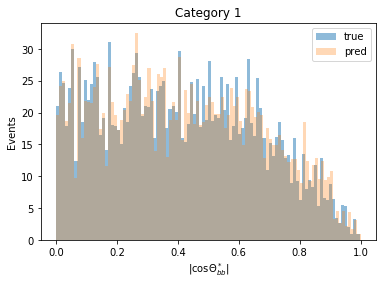

Total number of event in pred hist:  1600.48539193
Total number of event in true hist:  1598.31203357


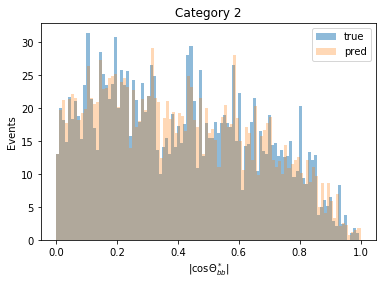

Total number of event in pred hist:  539.838829384
Total number of event in true hist:  567.590690494


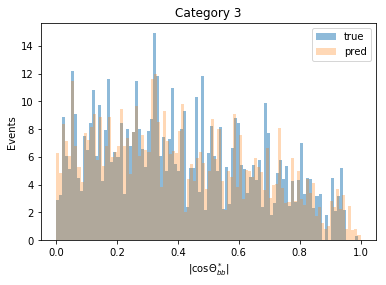

Total number of event in pred hist:  130.657690874
Total number of event in true hist:  141.692444487


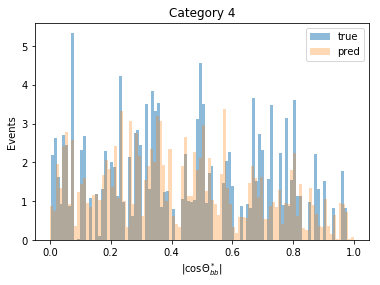

Total number of event in pred hist:  331.561212845
Total number of event in true hist:  311.644967954


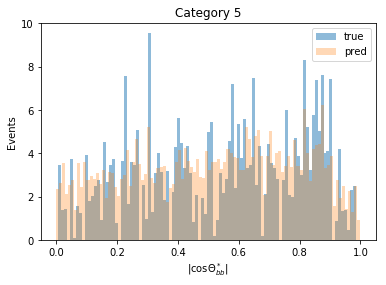

Total number of event in pred hist:  585.95770503
Total number of event in true hist:  561.910226826


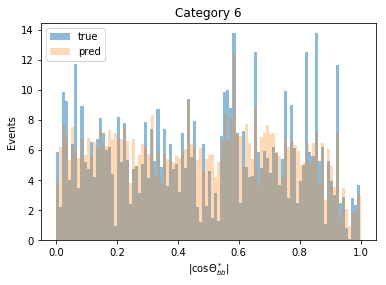

Total number of event in pred hist:  427.909447452
Total number of event in true hist:  453.679127928


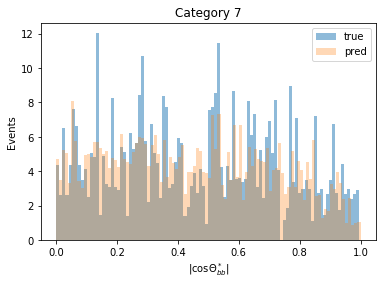

Total number of event in pred hist:  200.353952549
Total number of event in true hist:  195.378621365


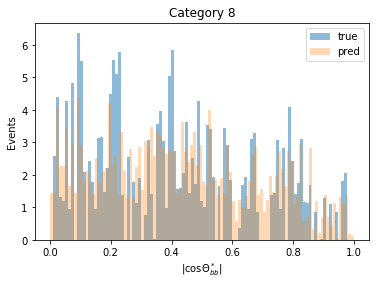

Total number of event in pred hist:  320.168402865
Total number of event in true hist:  318.33864342


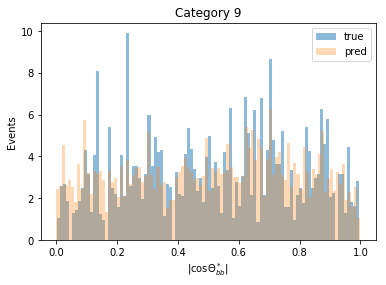

Total number of event in pred hist:  733.629108547
Total number of event in true hist:  727.188727313


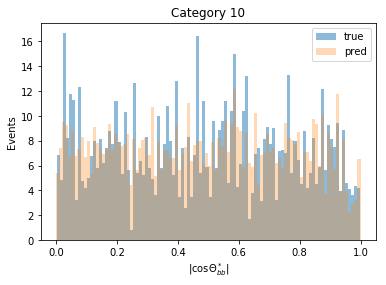

Total number of event in pred hist:  581.465509272
Total number of event in true hist:  589.334735863


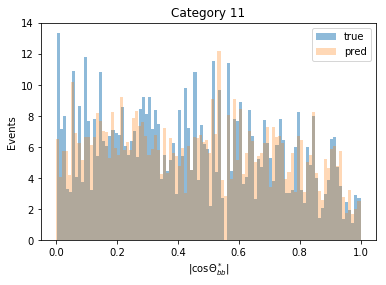

Total number of event in pred hist:  243.032690879
Total number of event in true hist:  249.087210931


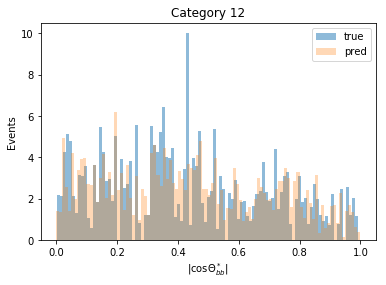

In [15]:
for i in range (0,12):
    cat_true=df[df.cat_true==i+1]
    plt.hist(np.abs(cat_true['cos_theta_hbb'].ravel()),weights=cat_true.w_true.ravel(),bins=100,alpha=0.5,label='true')
    plt.hist(np.abs(df['cos_theta_hbb'].ravel()),weights=y_pred_weight[i].ravel(),bins=100,alpha=0.3,label='pred')
    h_true=np.histogram(np.abs(cat_true['cos_theta_hbb'].ravel()),weights=cat_true.w_true,bins=100)
    h_pred=np.histogram(np.abs(df['cos_theta_hbb'].ravel()),weights=y_pred_weight[i].ravel(),bins=100)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("|cos$\Theta_{bb}^*$|")
    plt.title('Category %d'%(i+1))
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  1774.64943897
Total number of event in true hist:  1755.55195523


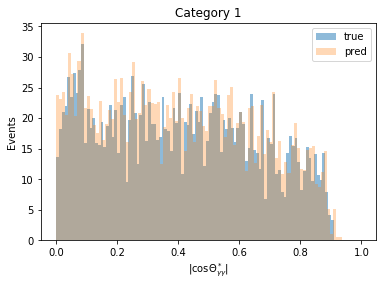

Total number of event in pred hist:  1600.48539193
Total number of event in true hist:  1598.31203357


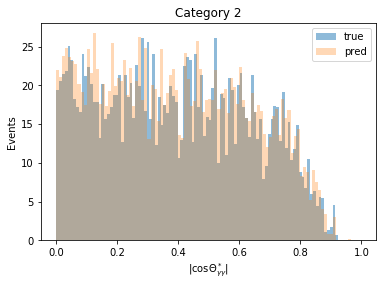

Total number of event in pred hist:  539.838829384
Total number of event in true hist:  567.590690494


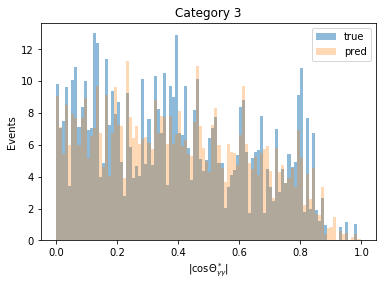

Total number of event in pred hist:  130.657690874
Total number of event in true hist:  141.692444487


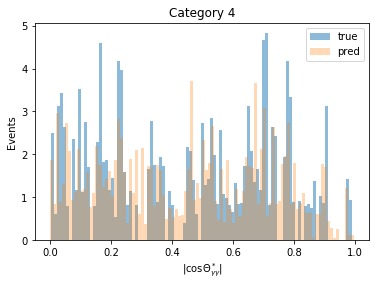

Total number of event in pred hist:  331.561212845
Total number of event in true hist:  311.644967954


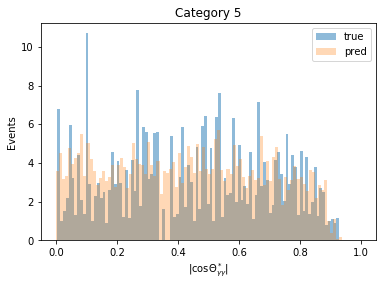

Total number of event in pred hist:  585.95770503
Total number of event in true hist:  561.910226826


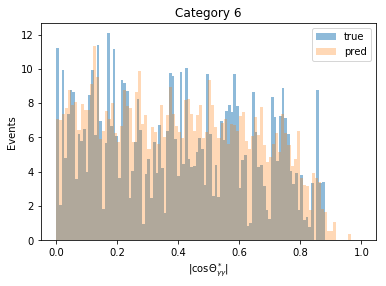

Total number of event in pred hist:  427.909447452
Total number of event in true hist:  453.679127928


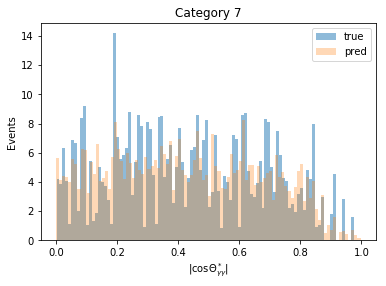

Total number of event in pred hist:  200.353952549
Total number of event in true hist:  195.378621365


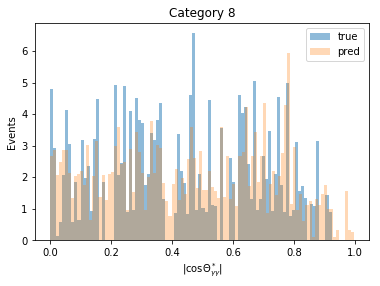

Total number of event in pred hist:  320.168402865
Total number of event in true hist:  318.33864342


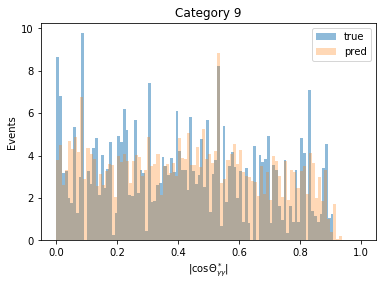

Total number of event in pred hist:  733.629108547
Total number of event in true hist:  727.188727313


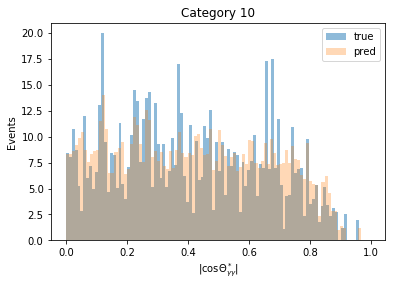

Total number of event in pred hist:  581.465509272
Total number of event in true hist:  589.334735863


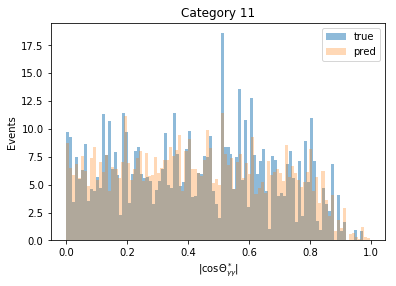

Total number of event in pred hist:  243.032690879
Total number of event in true hist:  249.087210931


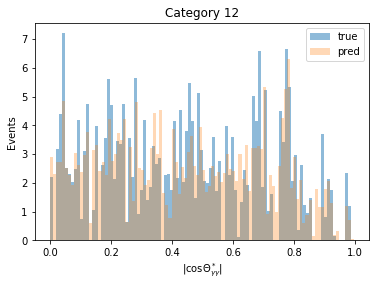

In [16]:
for i in range (0,12):
    cat_true=df[df.cat_true==i+1]
    plt.hist(np.abs(cat_true['cos_theta_hgg'].ravel()),weights=cat_true.w_true.ravel(),bins=100,alpha=0.5,label='true')
    plt.hist(np.abs(df['cos_theta_hgg'].ravel()),weights=y_pred_weight[i].ravel(),bins=100,alpha=0.3,label='pred')
    h_true=np.histogram(np.abs(cat_true['cos_theta_hgg'].ravel()),weights=cat_true.w_true,bins=100)
    h_pred=np.histogram(np.abs(df['cos_theta_hgg'].ravel()),weights=y_pred_weight[i].ravel(),bins=100)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("|cos$\Theta_{\gamma\gamma}^*$|")
    plt.title('Category %d'%(i+1))
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  1774.64943897
Total number of event in true hist:  1755.55195523


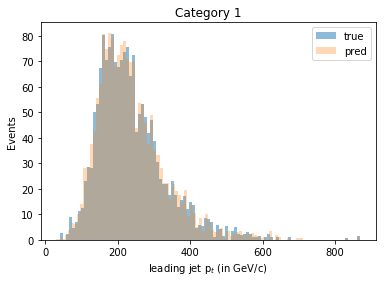

Total number of event in pred hist:  1600.48539193
Total number of event in true hist:  1598.31203357


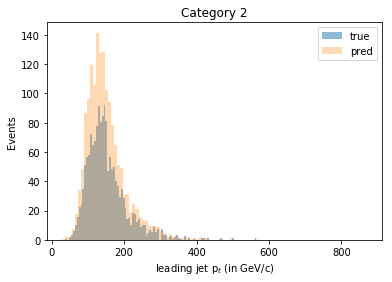

Total number of event in pred hist:  539.838829384
Total number of event in true hist:  567.590690494


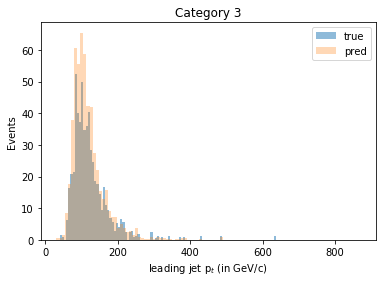

Total number of event in pred hist:  130.657690874
Total number of event in true hist:  141.692444487


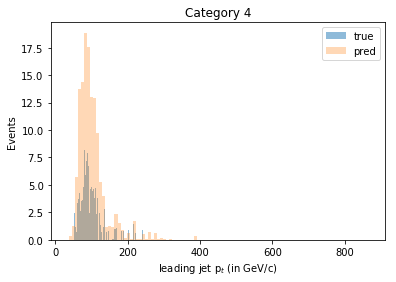

Total number of event in pred hist:  331.561212845
Total number of event in true hist:  311.644967954


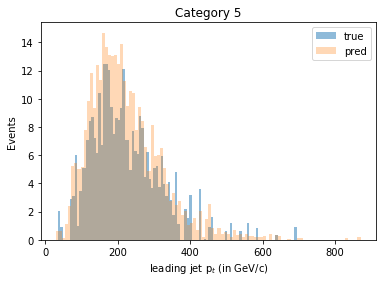

Total number of event in pred hist:  585.95770503
Total number of event in true hist:  561.910226826


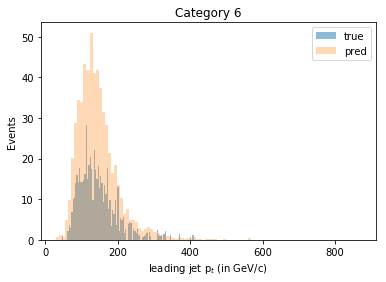

Total number of event in pred hist:  427.909447452
Total number of event in true hist:  453.679127928


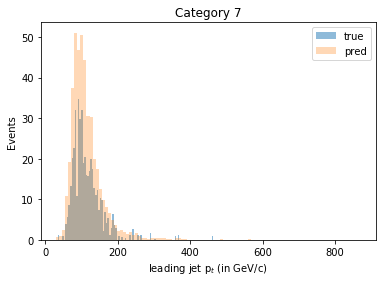

Total number of event in pred hist:  200.353952549
Total number of event in true hist:  195.378621365


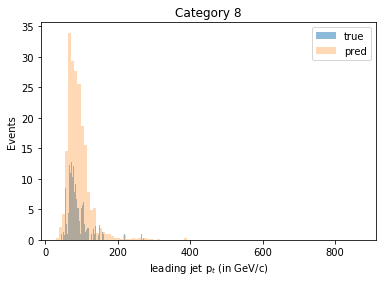

Total number of event in pred hist:  320.168402865
Total number of event in true hist:  318.33864342


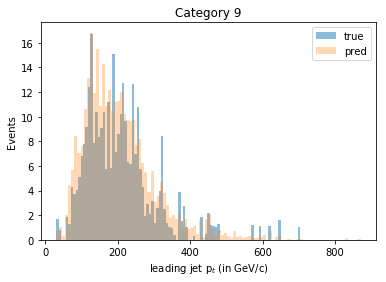

Total number of event in pred hist:  733.629108547
Total number of event in true hist:  727.188727313


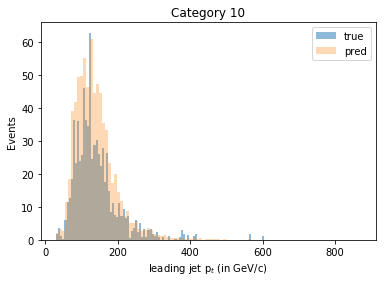

Total number of event in pred hist:  581.465509272
Total number of event in true hist:  589.334735863


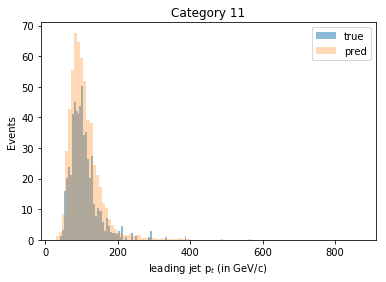

Total number of event in pred hist:  243.032690879
Total number of event in true hist:  249.087210931


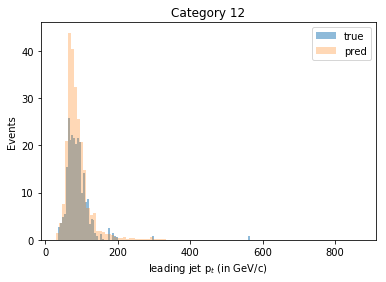

In [17]:
for i in range (0,12):
    cat_true=df[df.cat_true==i+1]
    plt.hist(cat_true['leadJet_pt'].ravel(),weights=cat_true.w_true.ravel(),bins=100,alpha=0.5,label='true')
    plt.hist(df['leadJet_pt'].ravel(),weights=y_pred_weight[i].ravel(),bins=100,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['leadJet_pt'].ravel(),weights=cat_true.w_true,bins=100)
    h_pred=np.histogram(df['leadJet_pt'].ravel(),weights=y_pred_weight[i].ravel(),bins=100)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("leading jet p$_t$ (in GeV/c)")
    plt.title('Category %d'%(i+1))
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  1774.64943897
Total number of event in true hist:  1755.55195523


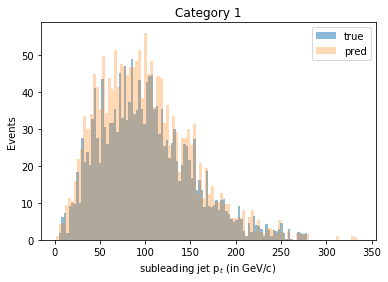

Total number of event in pred hist:  1600.48539193
Total number of event in true hist:  1598.31203357


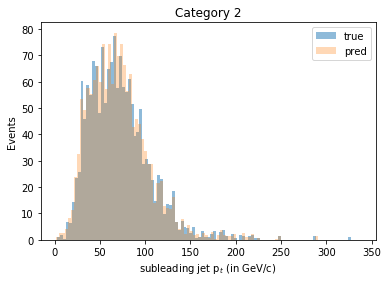

Total number of event in pred hist:  539.838829384
Total number of event in true hist:  567.590690494


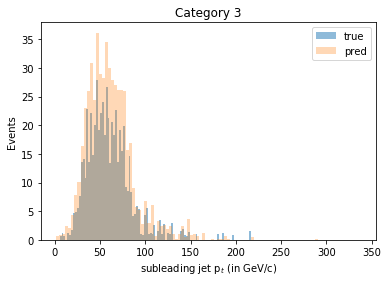

Total number of event in pred hist:  130.657690874
Total number of event in true hist:  141.692444487


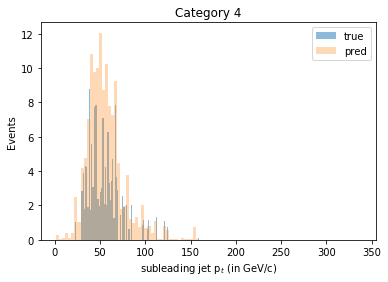

Total number of event in pred hist:  331.561212845
Total number of event in true hist:  311.644967954


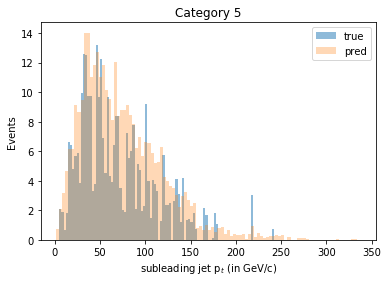

Total number of event in pred hist:  585.95770503
Total number of event in true hist:  561.910226826


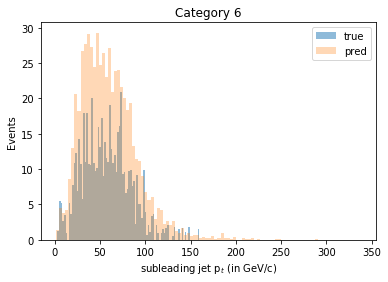

Total number of event in pred hist:  427.909447452
Total number of event in true hist:  453.679127928


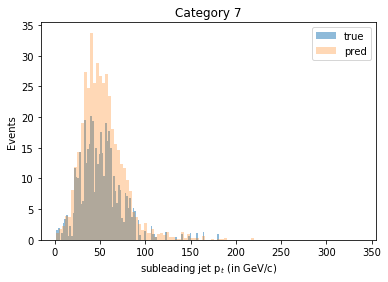

Total number of event in pred hist:  200.353952549
Total number of event in true hist:  195.378621365


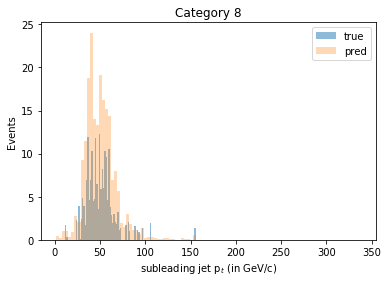

Total number of event in pred hist:  320.168402865
Total number of event in true hist:  318.33864342


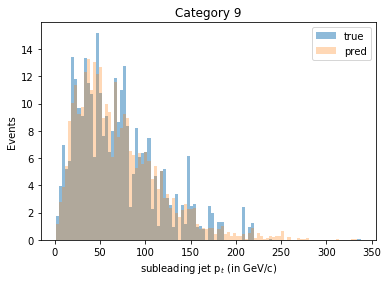

Total number of event in pred hist:  733.629108547
Total number of event in true hist:  727.188727313


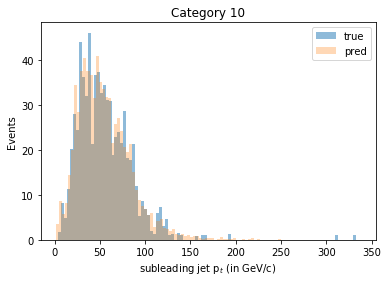

Total number of event in pred hist:  581.465509272
Total number of event in true hist:  589.334735863


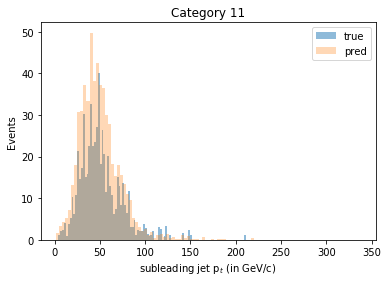

Total number of event in pred hist:  243.032690879
Total number of event in true hist:  249.087210931


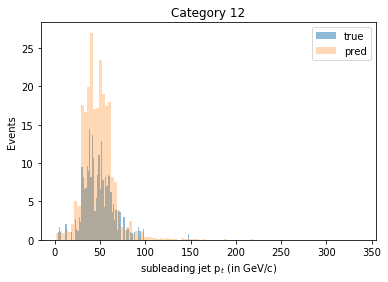

In [18]:
for i in range (0,12):
    cat_true=df[df.cat_true==i+1]
    plt.hist(cat_true['subleadJet_pt'].ravel(),weights=cat_true.w_true.ravel(),bins=100,alpha=0.5,label='true')
    plt.hist(df['subleadJet_pt'].ravel(),weights=y_pred_weight[i].ravel(),bins=100,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['subleadJet_pt'].ravel(),weights=cat_true.w_true,bins=100)
    h_pred=np.histogram(df['subleadJet_pt'].ravel(),weights=y_pred_weight[i].ravel(),bins=100)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("subleading jet p$_t$ (in GeV/c)")
    plt.title('Category %d'%(i+1))
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  1774.64943897
Total number of event in true hist:  1755.55195523


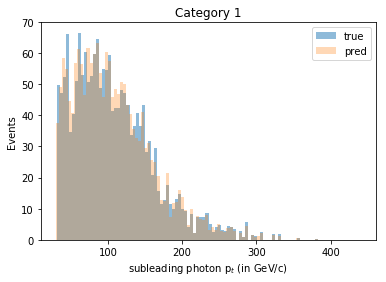

Total number of event in pred hist:  1600.48539193
Total number of event in true hist:  1598.31203357


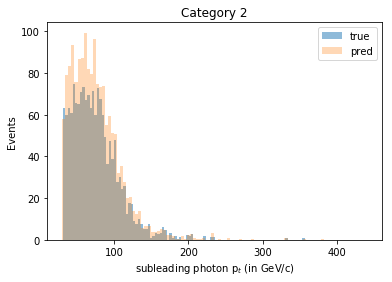

Total number of event in pred hist:  539.838829384
Total number of event in true hist:  567.590690494


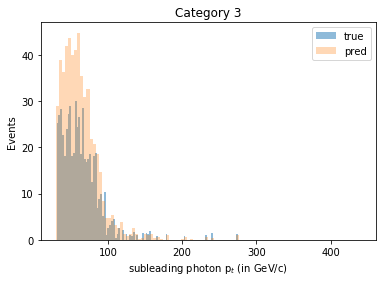

Total number of event in pred hist:  130.657690874
Total number of event in true hist:  141.692444487


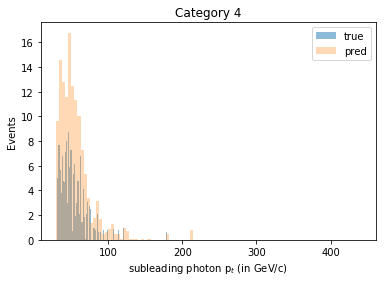

Total number of event in pred hist:  331.561212845
Total number of event in true hist:  311.644967954


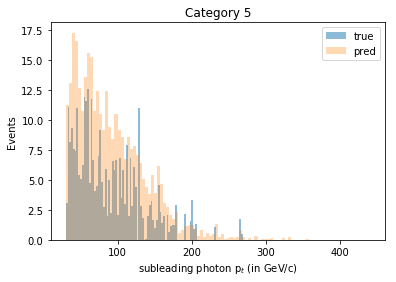

Total number of event in pred hist:  585.95770503
Total number of event in true hist:  561.910226826


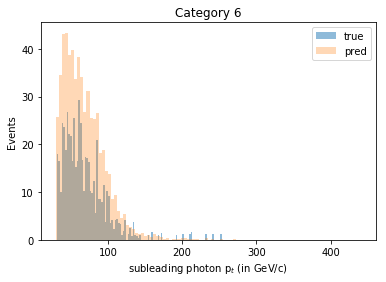

Total number of event in pred hist:  427.909447452
Total number of event in true hist:  453.679127928


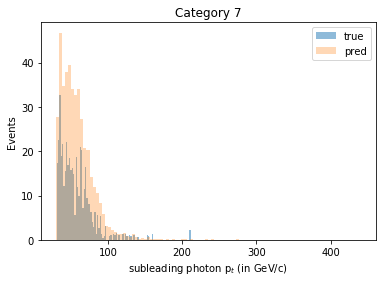

Total number of event in pred hist:  200.353952549
Total number of event in true hist:  195.378621365


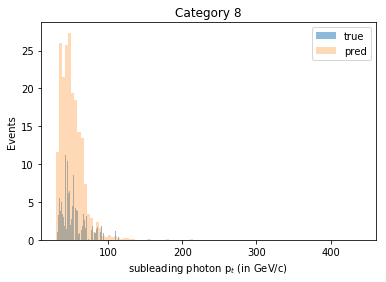

Total number of event in pred hist:  320.168402865
Total number of event in true hist:  318.33864342


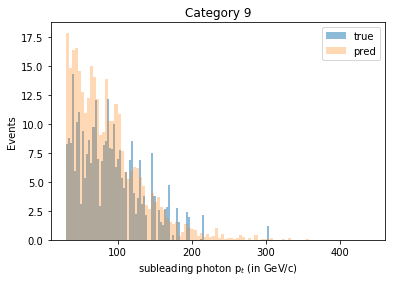

Total number of event in pred hist:  733.629108547
Total number of event in true hist:  727.188727313


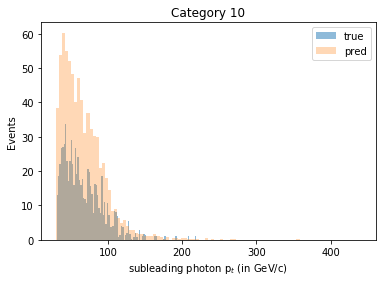

Total number of event in pred hist:  581.465509272
Total number of event in true hist:  589.334735863


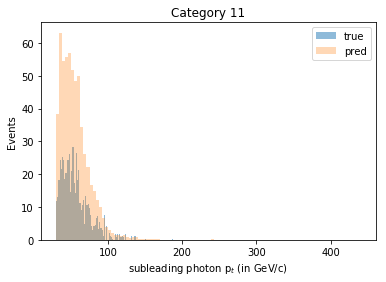

Total number of event in pred hist:  243.032690879
Total number of event in true hist:  249.087210931


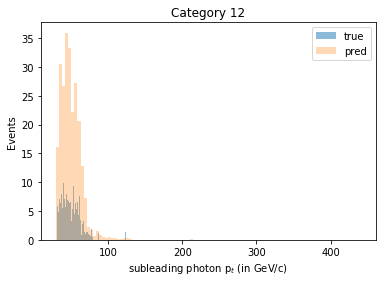

In [19]:
for i in range (0,12):
    cat_true=df[df.cat_true==i+1]
    plt.hist(cat_true['subleadPho_pt'].ravel(),weights=cat_true.w_true.ravel(),bins=100,alpha=0.5,label='true')
    plt.hist(df['subleadPho_pt'].ravel(),weights=y_pred_weight[i].ravel(),bins=100,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['subleadPho_pt'].ravel(),weights=cat_true.w_true,bins=100)
    h_pred=np.histogram(df['subleadPho_pt'].ravel(),weights=y_pred_weight[i].ravel(),bins=100)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("subleading photon p$_t$ (in GeV/c)")
    plt.title('Category %d'%(i+1))
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  1774.64943897
Total number of event in true hist:  1755.55195523


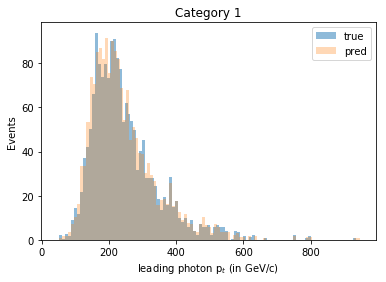

Total number of event in pred hist:  1600.48539193
Total number of event in true hist:  1598.31203357


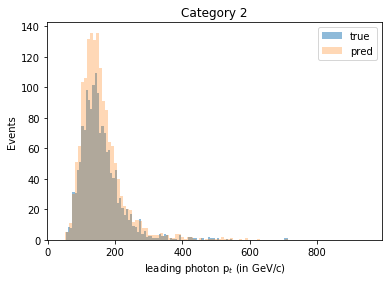

Total number of event in pred hist:  539.838829384
Total number of event in true hist:  567.590690494


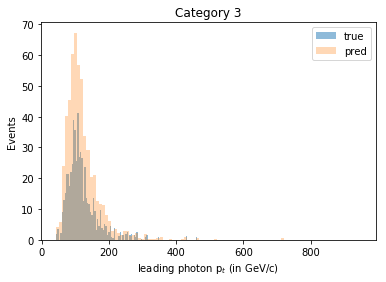

Total number of event in pred hist:  130.657690874
Total number of event in true hist:  141.692444487


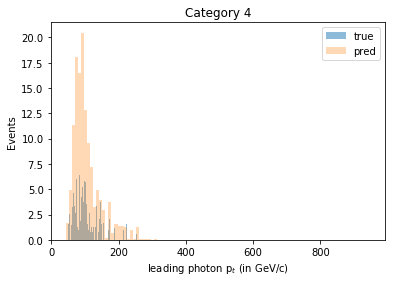

Total number of event in pred hist:  331.561212845
Total number of event in true hist:  311.644967954


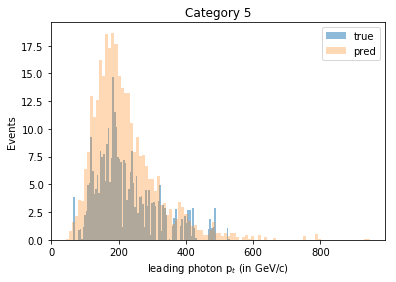

Total number of event in pred hist:  585.95770503
Total number of event in true hist:  561.910226826


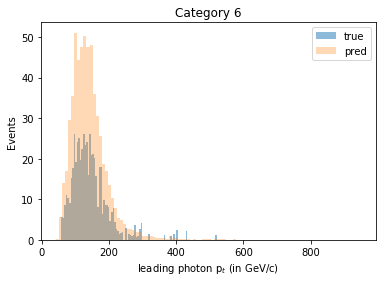

Total number of event in pred hist:  427.909447452
Total number of event in true hist:  453.679127928


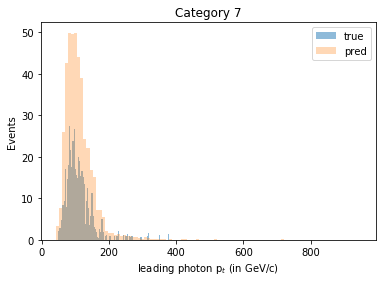

Total number of event in pred hist:  200.353952549
Total number of event in true hist:  195.378621365


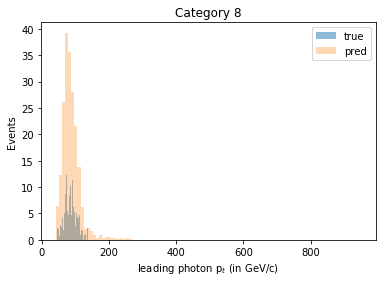

Total number of event in pred hist:  320.168402865
Total number of event in true hist:  318.33864342


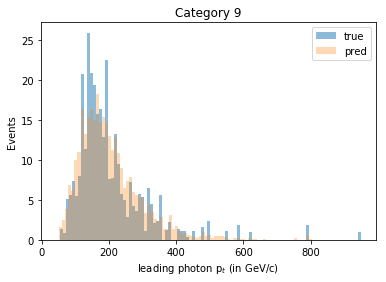

Total number of event in pred hist:  733.629108547
Total number of event in true hist:  727.188727313


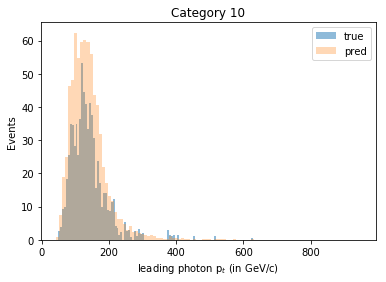

Total number of event in pred hist:  581.465509272
Total number of event in true hist:  589.334735863


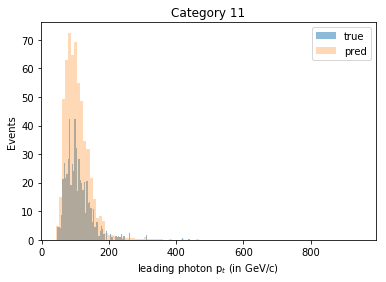

Total number of event in pred hist:  243.032690879
Total number of event in true hist:  249.087210931


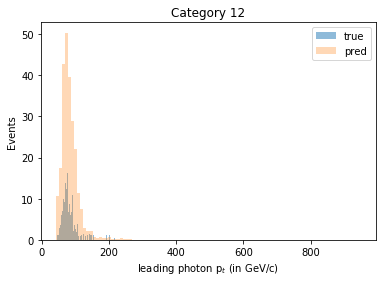

In [20]:
for i in range (0,12):
    cat_true=df[df.cat_true==i+1]
    plt.hist(cat_true['leadPho_pt'].ravel(),weights=cat_true.w_true.ravel(),bins=100,alpha=0.5,label='true')
    plt.hist(df['leadPho_pt'].ravel(),weights=y_pred_weight[i].ravel(),bins=100,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['leadPho_pt'].ravel(),weights=cat_true.w_true,bins=100)
    h_pred=np.histogram(df['leadPho_pt'].ravel(),weights=y_pred_weight[i].ravel(),bins=100)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("leading photon p$_t$ (in GeV/c)")
    plt.title('Category %d'%(i+1))
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  1774.64943897
Total number of event in true hist:  1755.55195523


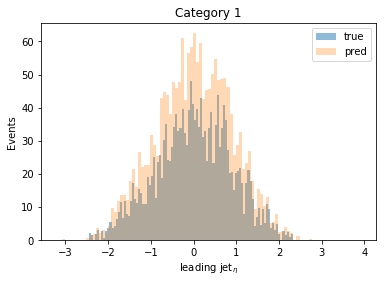

Total number of event in pred hist:  1600.48539193
Total number of event in true hist:  1598.31203357


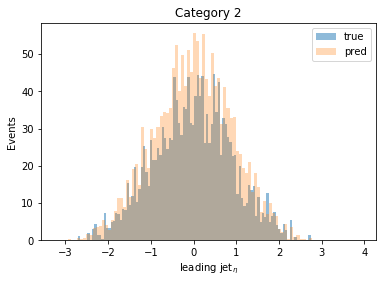

Total number of event in pred hist:  539.838829384
Total number of event in true hist:  567.590690494


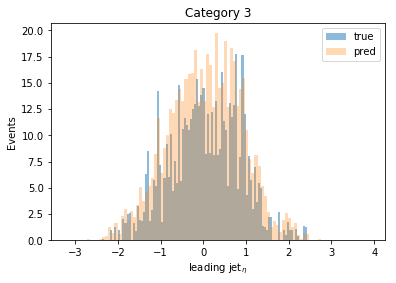

Total number of event in pred hist:  130.657690874
Total number of event in true hist:  141.692444487


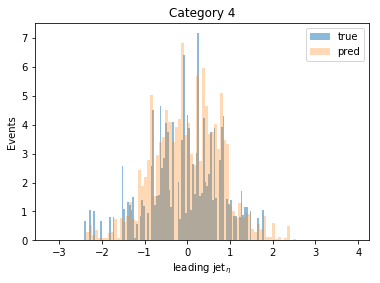

Total number of event in pred hist:  331.561212845
Total number of event in true hist:  311.644967954


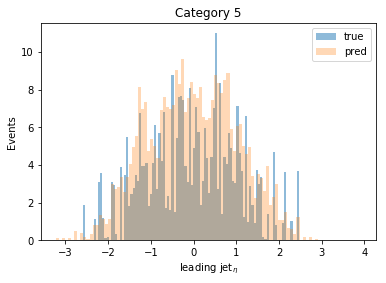

Total number of event in pred hist:  585.95770503
Total number of event in true hist:  561.910226826


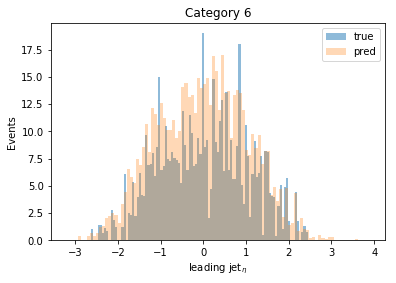

Total number of event in pred hist:  427.909447452
Total number of event in true hist:  453.679127928


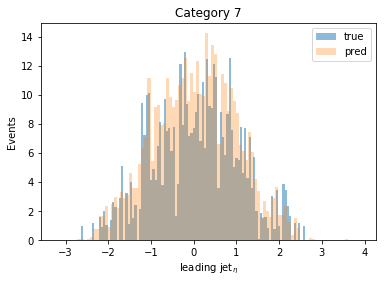

Total number of event in pred hist:  200.353952549
Total number of event in true hist:  195.378621365


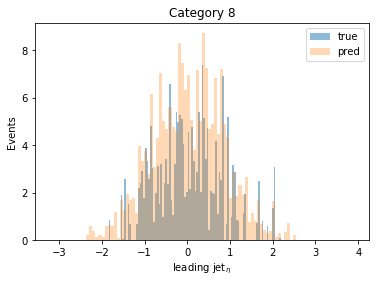

Total number of event in pred hist:  320.168402865
Total number of event in true hist:  318.33864342


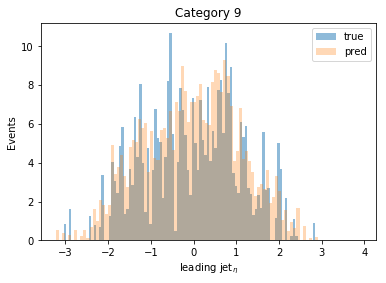

Total number of event in pred hist:  733.629108547
Total number of event in true hist:  727.188727313


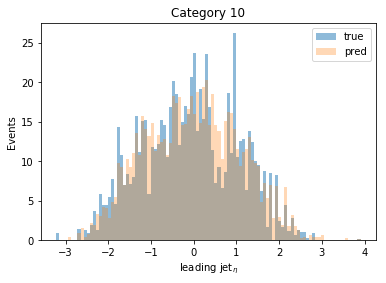

Total number of event in pred hist:  581.465509272
Total number of event in true hist:  589.334735863


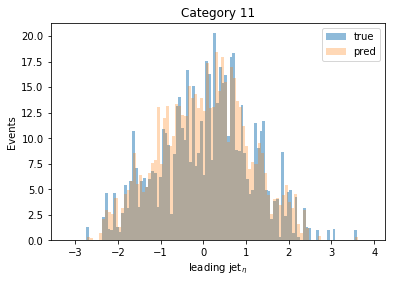

Total number of event in pred hist:  243.032690879
Total number of event in true hist:  249.087210931


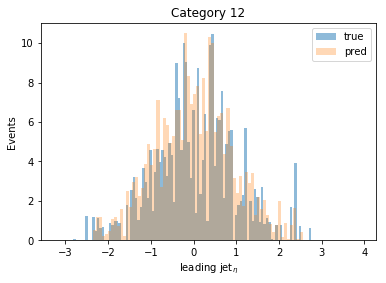

In [21]:
for i in range (0,12):
    cat_true=df[df.cat_true==i+1]
    plt.hist(cat_true['leadJet_eta'].ravel(),weights=cat_true.w_true.ravel(),bins=100,alpha=0.5,label='true')
    plt.hist(df['leadJet_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=100,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['leadJet_eta'].ravel(),weights=cat_true.w_true,bins=100)
    h_pred=np.histogram(df['leadJet_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=100)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("leading jet$_{\eta}$")
    plt.title('Category %d'%(i+1))
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  1774.64943897
Total number of event in true hist:  1755.55195523


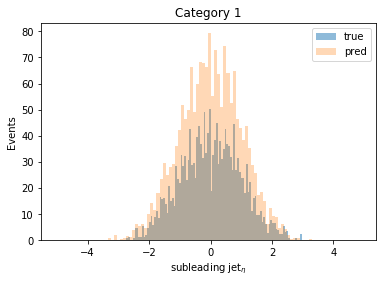

Total number of event in pred hist:  1600.48539193
Total number of event in true hist:  1598.31203357


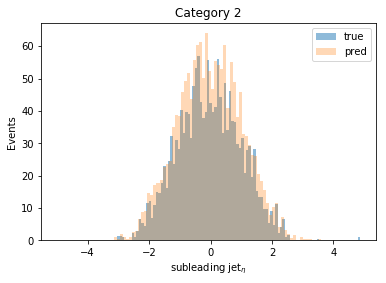

Total number of event in pred hist:  539.838829384
Total number of event in true hist:  567.590690494


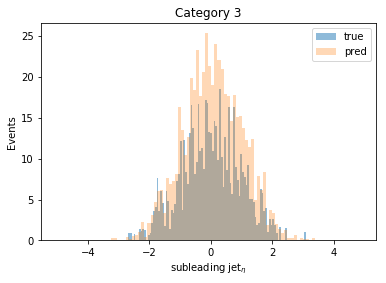

Total number of event in pred hist:  130.657690874
Total number of event in true hist:  141.692444487


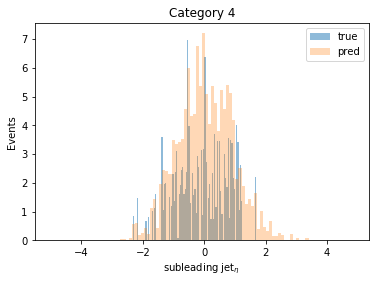

Total number of event in pred hist:  331.561212845
Total number of event in true hist:  311.644967954


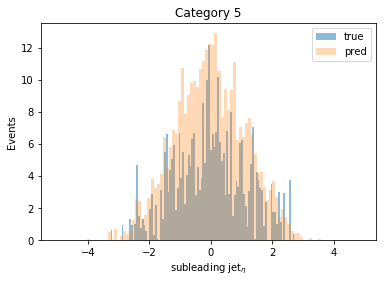

Total number of event in pred hist:  585.95770503
Total number of event in true hist:  561.910226826


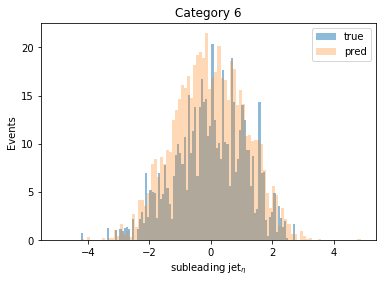

Total number of event in pred hist:  427.909447452
Total number of event in true hist:  453.679127928


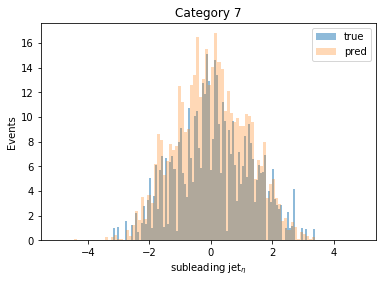

Total number of event in pred hist:  200.353952549
Total number of event in true hist:  195.378621365


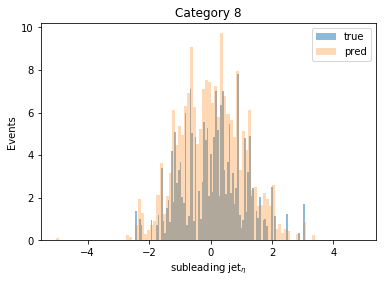

Total number of event in pred hist:  320.168402865
Total number of event in true hist:  318.33864342


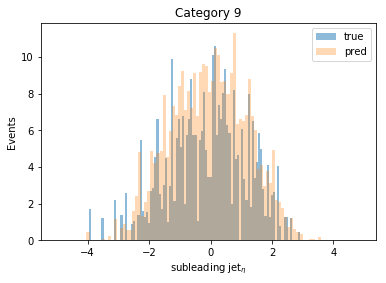

Total number of event in pred hist:  733.629108547
Total number of event in true hist:  727.188727313


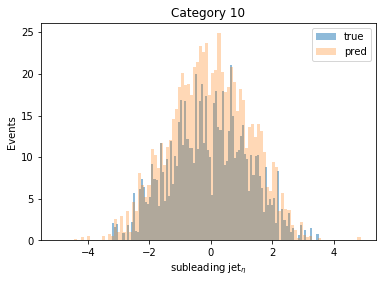

Total number of event in pred hist:  581.465509272
Total number of event in true hist:  589.334735863


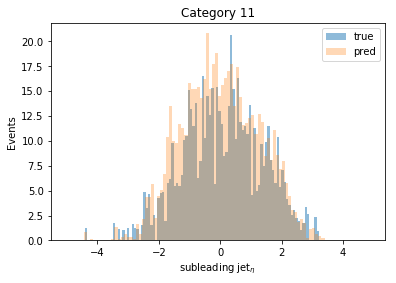

Total number of event in pred hist:  243.032690879
Total number of event in true hist:  249.087210931


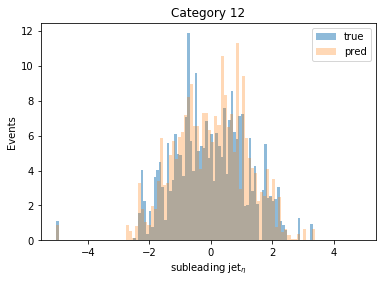

In [22]:
for i in range (0,12):
    cat_true=df[df.cat_true==i+1]
    plt.hist(cat_true['subleadJet_eta'].ravel(),weights=cat_true.w_true.ravel(),bins=100,alpha=0.5,label='true')
    plt.hist(df['subleadJet_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=100,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['subleadJet_eta'].ravel(),weights=cat_true.w_true,bins=100)
    h_pred=np.histogram(df['subleadJet_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=100)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("subleading jet$_{\eta}$")
    plt.title('Category %d'%(i+1))
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  1774.64943897
Total number of event in true hist:  1755.55195523


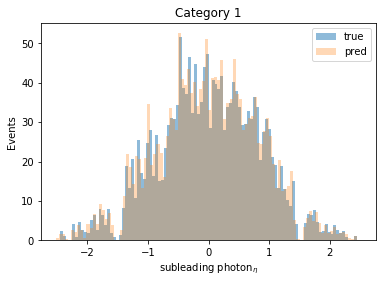

Total number of event in pred hist:  1600.48539193
Total number of event in true hist:  1598.31203357


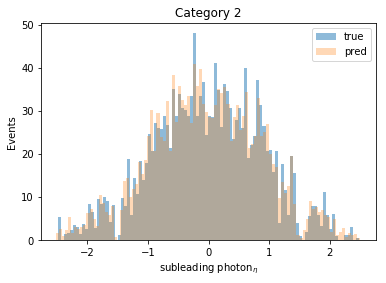

Total number of event in pred hist:  539.838829384
Total number of event in true hist:  567.590690494


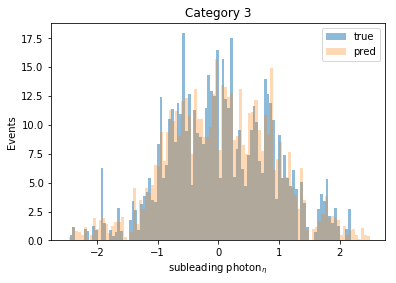

Total number of event in pred hist:  130.657690874
Total number of event in true hist:  141.692444487


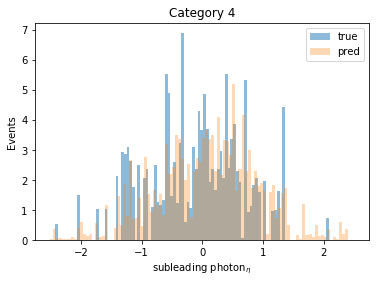

Total number of event in pred hist:  331.561212845
Total number of event in true hist:  311.644967954


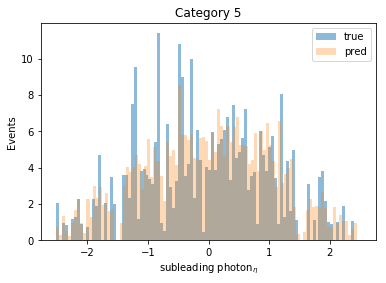

Total number of event in pred hist:  585.95770503
Total number of event in true hist:  561.910226826


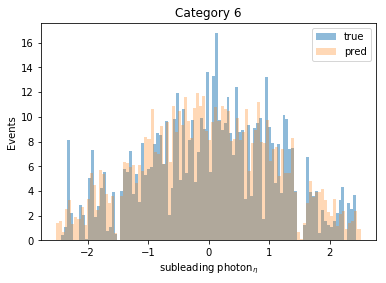

Total number of event in pred hist:  427.909447452
Total number of event in true hist:  453.679127928


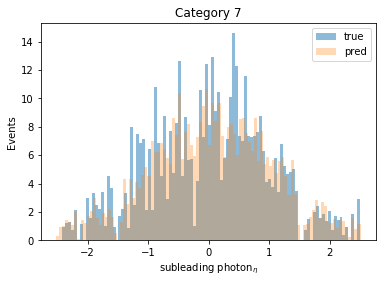

Total number of event in pred hist:  200.353952549
Total number of event in true hist:  195.378621365


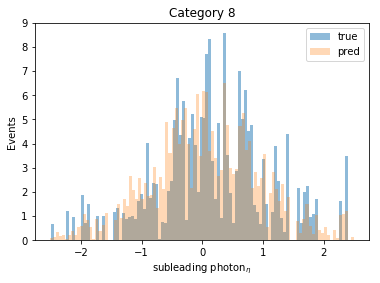

Total number of event in pred hist:  320.168402865
Total number of event in true hist:  318.33864342


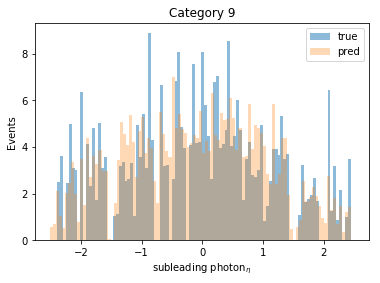

Total number of event in pred hist:  733.629108547
Total number of event in true hist:  727.188727313


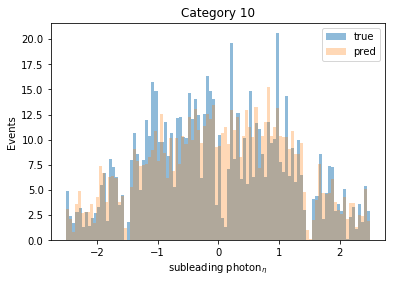

Total number of event in pred hist:  581.465509272
Total number of event in true hist:  589.334735863


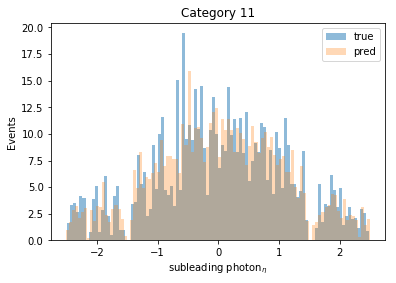

Total number of event in pred hist:  243.032690879
Total number of event in true hist:  249.087210931


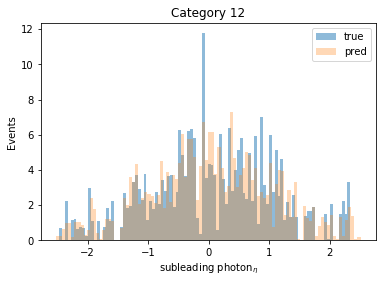

In [ ]:
for i in range (0,12):
    cat_true=df[df.cat_true==i+1]
    plt.hist(cat_true['subleadPho_eta'].ravel(),weights=cat_true.w_true.ravel(),bins=100,alpha=0.5,label='true')
    plt.hist(df['subleadPho_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=100,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['subleadPho_eta'].ravel(),weights=cat_true.w_true,bins=100)
    h_pred=np.histogram(df['subleadPho_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=100)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("subleading photon$_{\eta}$")
    plt.title('Category %d'%(i+1))
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  1774.64943897
Total number of event in true hist:  1755.55195523


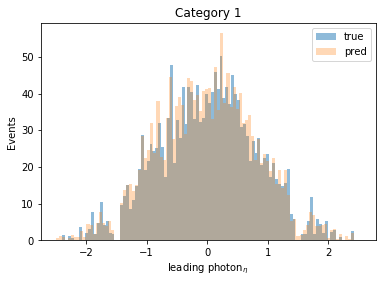

Total number of event in pred hist:  1600.48539193
Total number of event in true hist:  1598.31203357


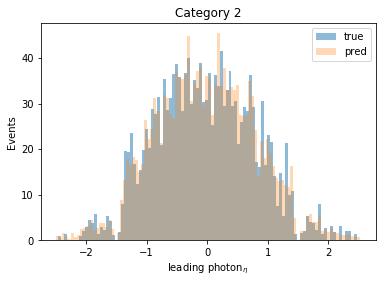

Total number of event in pred hist:  539.838829384
Total number of event in true hist:  567.590690494


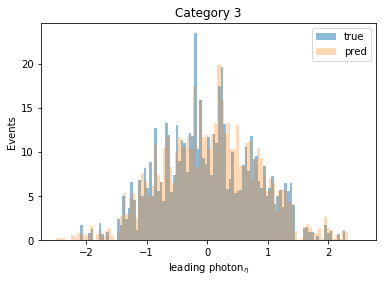

Total number of event in pred hist:  130.657690874
Total number of event in true hist:  141.692444487


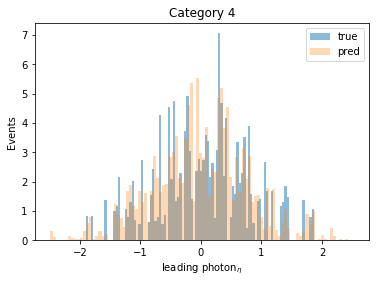

Total number of event in pred hist:  331.561212845
Total number of event in true hist:  311.644967954


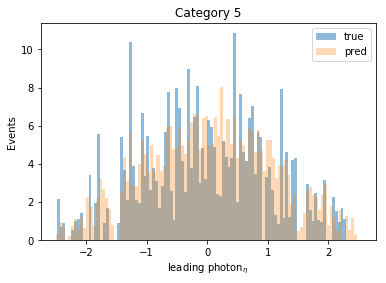

Total number of event in pred hist:  585.95770503
Total number of event in true hist:  561.910226826


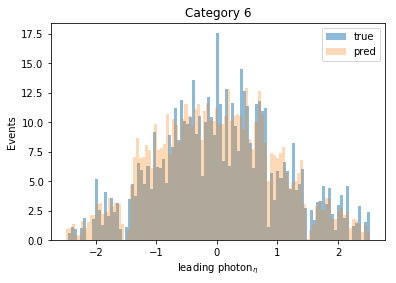

Total number of event in pred hist:  427.909447452
Total number of event in true hist:  453.679127928


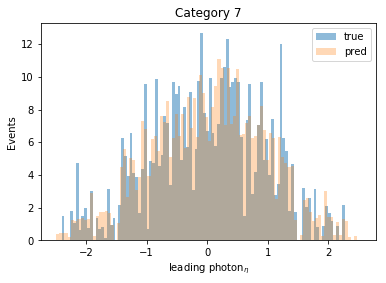

Total number of event in pred hist:  200.353952549
Total number of event in true hist:  195.378621365


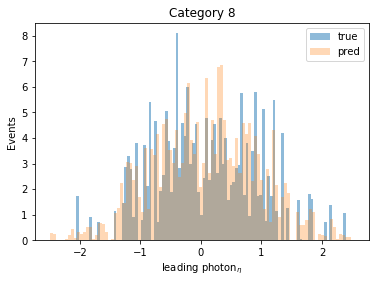

Total number of event in pred hist:  320.168402865
Total number of event in true hist:  318.33864342


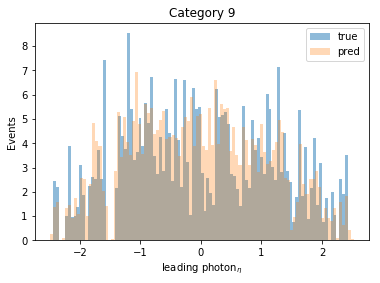

Total number of event in pred hist:  733.629108547
Total number of event in true hist:  727.188727313


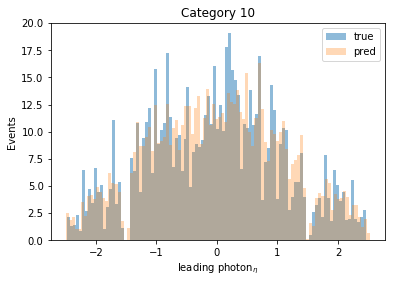

Total number of event in pred hist:  581.465509272
Total number of event in true hist:  589.334735863


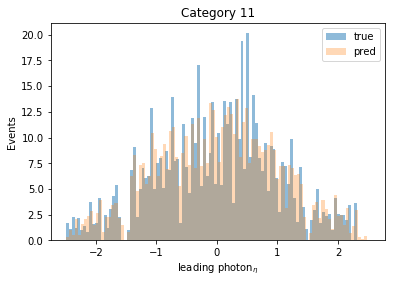

Total number of event in pred hist:  243.032690879
Total number of event in true hist:  249.087210931


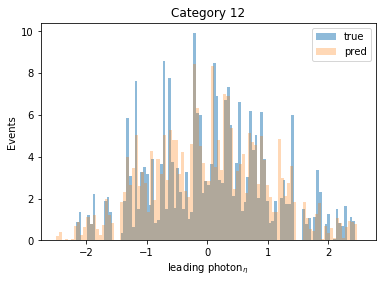

In [ ]:
for i in range (0,12):
    cat_true=df[df.cat_true==i+1]
    plt.hist(cat_true['leadPho_eta'].ravel(),weights=cat_true.w_true.ravel(),bins=100,alpha=0.5,label='true')
    plt.hist(df['leadPho_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=100,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['leadPho_eta'].ravel(),weights=cat_true.w_true,bins=100)
    h_pred=np.histogram(df['leadPho_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=100)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("leading photon$_{\eta}$")
    plt.title('Category %d'%(i+1))
    plt.legend()
    plt.show()
    plt.close()